## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import energyefficiencyDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error 

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              900.8
Date:                Sun, 24 Jul 2022   Prob (F-statistic):                   9.05e-316
Time:                        16:17:58   Log-Likelihood:                         -122.24
No. Observations:                 614   AIC:                                      258.5
Df Residuals:                     607   BIC:                                      289.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

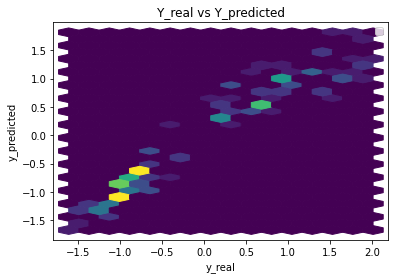

Performance Metrics
Mean Squared Error: 0.0713421277665083
Mean Absolute Error: 0.19243326071067995
Manhattan distance: 29.634722149444716
Euclidean distance: 3.3146172744439557


Stats Model MAE 0.19243326071067995


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)
mae = mean_absolute_error(y_pred, y_test)
print("Stats Model MAE", mae)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print("Catboost MAE",mae_cb)

Learning rate set to 0.037906


0:	learn: 0.9670902	total: 66ms	remaining: 1m 5s
1:	learn: 0.9349609	total: 66.7ms	remaining: 33.3s
2:	learn: 0.9079128	total: 68.1ms	remaining: 22.6s
3:	learn: 0.8777027	total: 68.7ms	remaining: 17.1s
4:	learn: 0.8532316	total: 69ms	remaining: 13.7s
5:	learn: 0.8253547	total: 70.3ms	remaining: 11.6s
6:	learn: 0.8031895	total: 70.7ms	remaining: 10s
7:	learn: 0.7782161	total: 71.5ms	remaining: 8.87s
8:	learn: 0.7522245	total: 72.2ms	remaining: 7.94s
9:	learn: 0.7287490	total: 72.7ms	remaining: 7.2s
10:	learn: 0.7059702	total: 73.3ms	remaining: 6.59s
11:	learn: 0.6831287	total: 74ms	remaining: 6.09s
12:	learn: 0.6630314	total: 74.6ms	remaining: 5.66s
13:	learn: 0.6428412	total: 75.2ms	remaining: 5.29s
14:	learn: 0.6224477	total: 75.9ms	remaining: 4.98s
15:	learn: 0.6023534	total: 76.5ms	remaining: 4.71s
16:	learn: 0.5837826	total: 78.4ms	remaining: 4.54s
17:	learn: 0.5667100	total: 80.3ms	remaining: 4.38s
18:	learn: 0.5495521	total: 81.1ms	remaining: 4.19s


19:	learn: 0.5337931	total: 82.5ms	remaining: 4.04s
20:	learn: 0.5184875	total: 83.1ms	remaining: 3.87s
21:	learn: 0.5019642	total: 84.1ms	remaining: 3.74s
22:	learn: 0.4859806	total: 84.7ms	remaining: 3.6s
23:	learn: 0.4728555	total: 85.9ms	remaining: 3.49s
24:	learn: 0.4578405	total: 86.6ms	remaining: 3.38s
25:	learn: 0.4442521	total: 88.5ms	remaining: 3.32s
26:	learn: 0.4312558	total: 89.5ms	remaining: 3.23s
27:	learn: 0.4182982	total: 90.4ms	remaining: 3.14s
28:	learn: 0.4075103	total: 91ms	remaining: 3.05s
29:	learn: 0.3975331	total: 91.3ms	remaining: 2.95s
30:	learn: 0.3861083	total: 91.9ms	remaining: 2.87s
31:	learn: 0.3750876	total: 92.4ms	remaining: 2.79s
32:	learn: 0.3642906	total: 92.8ms	remaining: 2.72s
33:	learn: 0.3536738	total: 93.7ms	remaining: 2.66s
34:	learn: 0.3426734	total: 95ms	remaining: 2.62s
35:	learn: 0.3333204	total: 95.7ms	remaining: 2.56s
36:	learn: 0.3231168	total: 96.5ms	remaining: 2.51s
37:	learn: 0.3139376	total: 97.2ms	remaining: 2.46s
38:	learn: 0.3058

84:	learn: 0.1079630	total: 136ms	remaining: 1.46s
85:	learn: 0.1058167	total: 136ms	remaining: 1.45s
86:	learn: 0.1041311	total: 138ms	remaining: 1.45s
87:	learn: 0.1020858	total: 138ms	remaining: 1.43s
88:	learn: 0.1005635	total: 140ms	remaining: 1.43s
89:	learn: 0.0991990	total: 141ms	remaining: 1.42s
90:	learn: 0.0973893	total: 142ms	remaining: 1.41s
91:	learn: 0.0961862	total: 142ms	remaining: 1.4s
92:	learn: 0.0944802	total: 143ms	remaining: 1.4s
93:	learn: 0.0927004	total: 145ms	remaining: 1.4s
94:	learn: 0.0915778	total: 146ms	remaining: 1.39s
95:	learn: 0.0897700	total: 146ms	remaining: 1.38s
96:	learn: 0.0888145	total: 147ms	remaining: 1.37s
97:	learn: 0.0873664	total: 148ms	remaining: 1.36s
98:	learn: 0.0857161	total: 148ms	remaining: 1.35s
99:	learn: 0.0851172	total: 148ms	remaining: 1.33s
100:	learn: 0.0835952	total: 149ms	remaining: 1.32s
101:	learn: 0.0826174	total: 149ms	remaining: 1.31s
102:	learn: 0.0811672	total: 150ms	remaining: 1.31s
103:	learn: 0.0799693	total: 15

142:	learn: 0.0535918	total: 189ms	remaining: 1.13s
143:	learn: 0.0531914	total: 190ms	remaining: 1.13s
144:	learn: 0.0528191	total: 206ms	remaining: 1.22s
145:	learn: 0.0526420	total: 207ms	remaining: 1.21s
146:	learn: 0.0523143	total: 207ms	remaining: 1.2s
147:	learn: 0.0519560	total: 207ms	remaining: 1.19s
148:	learn: 0.0516118	total: 210ms	remaining: 1.2s
149:	learn: 0.0514111	total: 212ms	remaining: 1.2s
150:	learn: 0.0512330	total: 212ms	remaining: 1.19s
151:	learn: 0.0509058	total: 213ms	remaining: 1.19s
152:	learn: 0.0506810	total: 213ms	remaining: 1.18s
153:	learn: 0.0503657	total: 214ms	remaining: 1.17s
154:	learn: 0.0500952	total: 214ms	remaining: 1.17s
155:	learn: 0.0498074	total: 215ms	remaining: 1.16s
156:	learn: 0.0495566	total: 216ms	remaining: 1.16s
157:	learn: 0.0494103	total: 216ms	remaining: 1.15s
158:	learn: 0.0491628	total: 218ms	remaining: 1.15s
159:	learn: 0.0489385	total: 218ms	remaining: 1.15s
160:	learn: 0.0486974	total: 219ms	remaining: 1.14s
161:	learn: 0.0

171:	learn: 0.0465523	total: 226ms	remaining: 1.09s
172:	learn: 0.0463754	total: 226ms	remaining: 1.08s
173:	learn: 0.0461912	total: 227ms	remaining: 1.08s
174:	learn: 0.0459461	total: 227ms	remaining: 1.07s
175:	learn: 0.0457893	total: 227ms	remaining: 1.06s
176:	learn: 0.0456412	total: 228ms	remaining: 1.06s
177:	learn: 0.0454702	total: 228ms	remaining: 1.05s
178:	learn: 0.0453104	total: 232ms	remaining: 1.06s
179:	learn: 0.0451354	total: 233ms	remaining: 1.06s
180:	learn: 0.0449701	total: 234ms	remaining: 1.06s
181:	learn: 0.0447981	total: 234ms	remaining: 1.05s
182:	learn: 0.0446284	total: 235ms	remaining: 1.05s
183:	learn: 0.0444660	total: 236ms	remaining: 1.04s
184:	learn: 0.0443053	total: 236ms	remaining: 1.04s
185:	learn: 0.0441339	total: 236ms	remaining: 1.03s
186:	learn: 0.0439996	total: 237ms	remaining: 1.03s
187:	learn: 0.0438990	total: 237ms	remaining: 1.02s
188:	learn: 0.0438006	total: 237ms	remaining: 1.02s
189:	learn: 0.0436389	total: 238ms	remaining: 1.01s
190:	learn: 

266:	learn: 0.0343922	total: 278ms	remaining: 764ms
267:	learn: 0.0343035	total: 279ms	remaining: 761ms
268:	learn: 0.0342560	total: 279ms	remaining: 759ms
269:	learn: 0.0341872	total: 280ms	remaining: 756ms
270:	learn: 0.0341413	total: 280ms	remaining: 754ms
271:	learn: 0.0340468	total: 280ms	remaining: 751ms
272:	learn: 0.0339494	total: 281ms	remaining: 748ms
273:	learn: 0.0338578	total: 282ms	remaining: 747ms
274:	learn: 0.0337627	total: 283ms	remaining: 745ms
275:	learn: 0.0336753	total: 283ms	remaining: 742ms
276:	learn: 0.0336308	total: 284ms	remaining: 741ms
277:	learn: 0.0334773	total: 285ms	remaining: 740ms
278:	learn: 0.0333853	total: 285ms	remaining: 737ms
279:	learn: 0.0333009	total: 286ms	remaining: 734ms
280:	learn: 0.0332571	total: 286ms	remaining: 732ms
281:	learn: 0.0332177	total: 286ms	remaining: 729ms
282:	learn: 0.0330688	total: 287ms	remaining: 726ms
283:	learn: 0.0329976	total: 287ms	remaining: 723ms
284:	learn: 0.0328549	total: 287ms	remaining: 721ms
285:	learn: 

369:	learn: 0.0275990	total: 325ms	remaining: 553ms
370:	learn: 0.0275347	total: 325ms	remaining: 551ms
371:	learn: 0.0274704	total: 327ms	remaining: 551ms
372:	learn: 0.0274037	total: 327ms	remaining: 550ms
373:	learn: 0.0273739	total: 328ms	remaining: 549ms
374:	learn: 0.0273159	total: 328ms	remaining: 547ms
375:	learn: 0.0272720	total: 329ms	remaining: 546ms
376:	learn: 0.0272449	total: 329ms	remaining: 544ms
377:	learn: 0.0272096	total: 329ms	remaining: 542ms
378:	learn: 0.0271698	total: 330ms	remaining: 540ms
379:	learn: 0.0271471	total: 330ms	remaining: 538ms
380:	learn: 0.0270867	total: 330ms	remaining: 537ms
381:	learn: 0.0270468	total: 331ms	remaining: 535ms
382:	learn: 0.0269934	total: 332ms	remaining: 534ms
383:	learn: 0.0269690	total: 332ms	remaining: 533ms
384:	learn: 0.0269352	total: 334ms	remaining: 533ms
385:	learn: 0.0268892	total: 334ms	remaining: 531ms
386:	learn: 0.0268716	total: 334ms	remaining: 530ms
387:	learn: 0.0268153	total: 346ms	remaining: 546ms
388:	learn: 

420:	learn: 0.0252812	total: 364ms	remaining: 500ms
421:	learn: 0.0252457	total: 365ms	remaining: 500ms
422:	learn: 0.0252313	total: 366ms	remaining: 499ms
423:	learn: 0.0251877	total: 366ms	remaining: 497ms
424:	learn: 0.0251548	total: 366ms	remaining: 495ms
425:	learn: 0.0250862	total: 366ms	remaining: 494ms
426:	learn: 0.0250633	total: 367ms	remaining: 492ms
427:	learn: 0.0250111	total: 367ms	remaining: 491ms
428:	learn: 0.0249735	total: 368ms	remaining: 490ms
429:	learn: 0.0249331	total: 369ms	remaining: 489ms
430:	learn: 0.0248831	total: 369ms	remaining: 487ms
431:	learn: 0.0248517	total: 369ms	remaining: 485ms
432:	learn: 0.0248117	total: 369ms	remaining: 484ms
433:	learn: 0.0247613	total: 370ms	remaining: 482ms
434:	learn: 0.0246998	total: 370ms	remaining: 481ms
435:	learn: 0.0246531	total: 371ms	remaining: 479ms
436:	learn: 0.0246158	total: 371ms	remaining: 478ms
437:	learn: 0.0245670	total: 372ms	remaining: 477ms
438:	learn: 0.0244939	total: 372ms	remaining: 476ms
439:	learn: 

482:	learn: 0.0230476	total: 410ms	remaining: 439ms
483:	learn: 0.0230055	total: 411ms	remaining: 438ms
484:	learn: 0.0229922	total: 417ms	remaining: 442ms
485:	learn: 0.0229541	total: 417ms	remaining: 441ms
486:	learn: 0.0229291	total: 419ms	remaining: 442ms
487:	learn: 0.0229103	total: 421ms	remaining: 441ms
488:	learn: 0.0228871	total: 422ms	remaining: 441ms
489:	learn: 0.0228238	total: 425ms	remaining: 442ms
490:	learn: 0.0227826	total: 425ms	remaining: 441ms
491:	learn: 0.0227424	total: 426ms	remaining: 440ms
492:	learn: 0.0227119	total: 428ms	remaining: 440ms
493:	learn: 0.0226619	total: 428ms	remaining: 439ms
494:	learn: 0.0226411	total: 429ms	remaining: 438ms
495:	learn: 0.0226185	total: 429ms	remaining: 436ms
496:	learn: 0.0225785	total: 430ms	remaining: 435ms
497:	learn: 0.0225474	total: 430ms	remaining: 433ms
498:	learn: 0.0225190	total: 430ms	remaining: 432ms
499:	learn: 0.0225043	total: 431ms	remaining: 431ms
500:	learn: 0.0224827	total: 431ms	remaining: 429ms
501:	learn: 

519:	learn: 0.0219440	total: 461ms	remaining: 425ms
520:	learn: 0.0219118	total: 462ms	remaining: 424ms
521:	learn: 0.0218433	total: 462ms	remaining: 423ms
522:	learn: 0.0218119	total: 462ms	remaining: 422ms
523:	learn: 0.0217998	total: 463ms	remaining: 420ms
524:	learn: 0.0217740	total: 463ms	remaining: 419ms
525:	learn: 0.0217552	total: 463ms	remaining: 417ms
526:	learn: 0.0217382	total: 464ms	remaining: 416ms
527:	learn: 0.0217231	total: 464ms	remaining: 415ms
528:	learn: 0.0216969	total: 466ms	remaining: 415ms
529:	learn: 0.0216850	total: 466ms	remaining: 414ms
530:	learn: 0.0216536	total: 467ms	remaining: 412ms
531:	learn: 0.0216370	total: 467ms	remaining: 411ms
532:	learn: 0.0216029	total: 468ms	remaining: 410ms
533:	learn: 0.0215829	total: 469ms	remaining: 409ms
534:	learn: 0.0215439	total: 469ms	remaining: 408ms
535:	learn: 0.0215277	total: 473ms	remaining: 409ms
536:	learn: 0.0215011	total: 474ms	remaining: 408ms
537:	learn: 0.0214853	total: 474ms	remaining: 407ms
538:	learn: 

554:	learn: 0.0210326	total: 493ms	remaining: 395ms
555:	learn: 0.0210009	total: 493ms	remaining: 394ms
556:	learn: 0.0209770	total: 495ms	remaining: 394ms
557:	learn: 0.0209626	total: 495ms	remaining: 392ms
558:	learn: 0.0209065	total: 496ms	remaining: 391ms
559:	learn: 0.0208947	total: 497ms	remaining: 390ms
560:	learn: 0.0208625	total: 497ms	remaining: 389ms
561:	learn: 0.0208329	total: 499ms	remaining: 389ms
562:	learn: 0.0208135	total: 499ms	remaining: 387ms
563:	learn: 0.0207821	total: 500ms	remaining: 386ms
564:	learn: 0.0207564	total: 500ms	remaining: 385ms
565:	learn: 0.0207328	total: 501ms	remaining: 384ms
566:	learn: 0.0207022	total: 501ms	remaining: 383ms
567:	learn: 0.0206847	total: 501ms	remaining: 381ms
568:	learn: 0.0206407	total: 502ms	remaining: 380ms
569:	learn: 0.0206214	total: 502ms	remaining: 379ms
570:	learn: 0.0205845	total: 502ms	remaining: 377ms
571:	learn: 0.0205686	total: 504ms	remaining: 377ms
572:	learn: 0.0205472	total: 504ms	remaining: 376ms
573:	learn: 

667:	learn: 0.0184776	total: 552ms	remaining: 275ms
668:	learn: 0.0184641	total: 554ms	remaining: 274ms
669:	learn: 0.0184530	total: 555ms	remaining: 273ms
670:	learn: 0.0184285	total: 556ms	remaining: 272ms
671:	learn: 0.0183980	total: 556ms	remaining: 271ms
672:	learn: 0.0183805	total: 556ms	remaining: 270ms
673:	learn: 0.0183748	total: 557ms	remaining: 269ms
674:	learn: 0.0183613	total: 557ms	remaining: 268ms
675:	learn: 0.0183330	total: 557ms	remaining: 267ms
676:	learn: 0.0183062	total: 558ms	remaining: 266ms
677:	learn: 0.0182809	total: 558ms	remaining: 265ms
678:	learn: 0.0182519	total: 559ms	remaining: 264ms
679:	learn: 0.0182449	total: 559ms	remaining: 263ms
680:	learn: 0.0182342	total: 559ms	remaining: 262ms
681:	learn: 0.0182233	total: 560ms	remaining: 261ms
682:	learn: 0.0182084	total: 561ms	remaining: 260ms
683:	learn: 0.0181977	total: 561ms	remaining: 259ms
684:	learn: 0.0181719	total: 562ms	remaining: 259ms
685:	learn: 0.0181586	total: 565ms	remaining: 258ms
686:	learn: 

729:	learn: 0.0173048	total: 604ms	remaining: 224ms
730:	learn: 0.0172934	total: 607ms	remaining: 223ms
731:	learn: 0.0172833	total: 608ms	remaining: 223ms
732:	learn: 0.0172447	total: 608ms	remaining: 222ms
733:	learn: 0.0172306	total: 610ms	remaining: 221ms
734:	learn: 0.0172031	total: 611ms	remaining: 220ms
735:	learn: 0.0171865	total: 611ms	remaining: 219ms
736:	learn: 0.0171717	total: 611ms	remaining: 218ms
737:	learn: 0.0171569	total: 612ms	remaining: 217ms
738:	learn: 0.0171532	total: 614ms	remaining: 217ms
739:	learn: 0.0171472	total: 615ms	remaining: 216ms
740:	learn: 0.0171323	total: 616ms	remaining: 215ms
741:	learn: 0.0171124	total: 616ms	remaining: 214ms
742:	learn: 0.0171057	total: 617ms	remaining: 213ms
743:	learn: 0.0170811	total: 617ms	remaining: 212ms
744:	learn: 0.0170686	total: 618ms	remaining: 211ms
745:	learn: 0.0170581	total: 618ms	remaining: 211ms
746:	learn: 0.0170510	total: 619ms	remaining: 210ms
747:	learn: 0.0170398	total: 620ms	remaining: 209ms
748:	learn: 

764:	learn: 0.0167545	total: 637ms	remaining: 196ms
765:	learn: 0.0167504	total: 638ms	remaining: 195ms
766:	learn: 0.0167401	total: 639ms	remaining: 194ms
767:	learn: 0.0167311	total: 640ms	remaining: 193ms
768:	learn: 0.0167196	total: 642ms	remaining: 193ms
769:	learn: 0.0167083	total: 642ms	remaining: 192ms
770:	learn: 0.0166986	total: 643ms	remaining: 191ms
771:	learn: 0.0166721	total: 644ms	remaining: 190ms
772:	learn: 0.0166602	total: 646ms	remaining: 190ms
773:	learn: 0.0166366	total: 647ms	remaining: 189ms
774:	learn: 0.0166259	total: 649ms	remaining: 188ms
775:	learn: 0.0166155	total: 649ms	remaining: 187ms
776:	learn: 0.0166059	total: 650ms	remaining: 186ms
777:	learn: 0.0165932	total: 650ms	remaining: 186ms
778:	learn: 0.0165726	total: 651ms	remaining: 185ms
779:	learn: 0.0165635	total: 653ms	remaining: 184ms
780:	learn: 0.0165571	total: 654ms	remaining: 183ms
781:	learn: 0.0165451	total: 654ms	remaining: 182ms
782:	learn: 0.0165372	total: 655ms	remaining: 181ms
783:	learn: 

825:	learn: 0.0158744	total: 707ms	remaining: 149ms
826:	learn: 0.0158612	total: 709ms	remaining: 148ms
827:	learn: 0.0158448	total: 712ms	remaining: 148ms
828:	learn: 0.0158385	total: 713ms	remaining: 147ms
829:	learn: 0.0158300	total: 714ms	remaining: 146ms
830:	learn: 0.0158086	total: 716ms	remaining: 146ms
831:	learn: 0.0157943	total: 716ms	remaining: 145ms
832:	learn: 0.0157858	total: 717ms	remaining: 144ms
833:	learn: 0.0157657	total: 717ms	remaining: 143ms
834:	learn: 0.0157581	total: 717ms	remaining: 142ms
835:	learn: 0.0157528	total: 717ms	remaining: 141ms
836:	learn: 0.0157299	total: 718ms	remaining: 140ms
837:	learn: 0.0157143	total: 718ms	remaining: 139ms
838:	learn: 0.0156996	total: 718ms	remaining: 138ms
839:	learn: 0.0156922	total: 719ms	remaining: 137ms
840:	learn: 0.0156865	total: 720ms	remaining: 136ms
841:	learn: 0.0156794	total: 723ms	remaining: 136ms
842:	learn: 0.0156638	total: 724ms	remaining: 135ms
843:	learn: 0.0156355	total: 724ms	remaining: 134ms
844:	learn: 

865:	learn: 0.0153119	total: 760ms	remaining: 118ms
866:	learn: 0.0152999	total: 761ms	remaining: 117ms
867:	learn: 0.0152883	total: 765ms	remaining: 116ms
868:	learn: 0.0152773	total: 766ms	remaining: 115ms
869:	learn: 0.0152682	total: 768ms	remaining: 115ms
870:	learn: 0.0152587	total: 768ms	remaining: 114ms
871:	learn: 0.0152549	total: 769ms	remaining: 113ms
872:	learn: 0.0152464	total: 770ms	remaining: 112ms
873:	learn: 0.0152364	total: 770ms	remaining: 111ms
874:	learn: 0.0152108	total: 771ms	remaining: 110ms
875:	learn: 0.0151994	total: 773ms	remaining: 109ms
876:	learn: 0.0151933	total: 776ms	remaining: 109ms
877:	learn: 0.0151781	total: 779ms	remaining: 108ms
878:	learn: 0.0151678	total: 782ms	remaining: 108ms
879:	learn: 0.0151552	total: 783ms	remaining: 107ms
880:	learn: 0.0151216	total: 784ms	remaining: 106ms
881:	learn: 0.0151009	total: 785ms	remaining: 105ms
882:	learn: 0.0150941	total: 786ms	remaining: 104ms
883:	learn: 0.0150748	total: 786ms	remaining: 103ms
884:	learn: 

887:	learn: 0.0150249	total: 792ms	remaining: 99.9ms
888:	learn: 0.0150119	total: 794ms	remaining: 99.1ms
889:	learn: 0.0150058	total: 795ms	remaining: 98.2ms
890:	learn: 0.0149929	total: 796ms	remaining: 97.3ms
891:	learn: 0.0149798	total: 796ms	remaining: 96.4ms
892:	learn: 0.0149655	total: 797ms	remaining: 95.5ms
893:	learn: 0.0149394	total: 800ms	remaining: 94.8ms
894:	learn: 0.0149327	total: 802ms	remaining: 94ms
895:	learn: 0.0149280	total: 802ms	remaining: 93.1ms
896:	learn: 0.0149098	total: 803ms	remaining: 92.3ms
897:	learn: 0.0148974	total: 805ms	remaining: 91.5ms
898:	learn: 0.0148846	total: 806ms	remaining: 90.6ms
899:	learn: 0.0148769	total: 806ms	remaining: 89.6ms
900:	learn: 0.0148654	total: 807ms	remaining: 88.7ms
901:	learn: 0.0148501	total: 808ms	remaining: 87.8ms
902:	learn: 0.0148351	total: 808ms	remaining: 86.8ms
903:	learn: 0.0148156	total: 811ms	remaining: 86.1ms
904:	learn: 0.0148068	total: 813ms	remaining: 85.3ms
905:	learn: 0.0147751	total: 813ms	remaining: 84

938:	learn: 0.0143648	total: 853ms	remaining: 55.4ms
939:	learn: 0.0143568	total: 855ms	remaining: 54.5ms
940:	learn: 0.0143468	total: 857ms	remaining: 53.7ms
941:	learn: 0.0143423	total: 858ms	remaining: 52.8ms
942:	learn: 0.0143330	total: 858ms	remaining: 51.9ms
943:	learn: 0.0143274	total: 859ms	remaining: 51ms
944:	learn: 0.0143189	total: 860ms	remaining: 50.1ms
945:	learn: 0.0142955	total: 861ms	remaining: 49.1ms
946:	learn: 0.0142864	total: 861ms	remaining: 48.2ms
947:	learn: 0.0142727	total: 862ms	remaining: 47.3ms
948:	learn: 0.0142543	total: 863ms	remaining: 46.4ms
949:	learn: 0.0142350	total: 864ms	remaining: 45.5ms
950:	learn: 0.0142197	total: 866ms	remaining: 44.6ms
951:	learn: 0.0142095	total: 867ms	remaining: 43.7ms
952:	learn: 0.0141970	total: 868ms	remaining: 42.8ms
953:	learn: 0.0141890	total: 869ms	remaining: 41.9ms
954:	learn: 0.0141832	total: 870ms	remaining: 41ms
955:	learn: 0.0141667	total: 873ms	remaining: 40.2ms
956:	learn: 0.0141589	total: 873ms	remaining: 39.2

975:	learn: 0.0138947	total: 904ms	remaining: 22.2ms
976:	learn: 0.0138770	total: 908ms	remaining: 21.4ms
977:	learn: 0.0138615	total: 909ms	remaining: 20.5ms
978:	learn: 0.0138541	total: 910ms	remaining: 19.5ms
979:	learn: 0.0138396	total: 912ms	remaining: 18.6ms
980:	learn: 0.0138050	total: 912ms	remaining: 17.7ms
981:	learn: 0.0137943	total: 914ms	remaining: 16.8ms
982:	learn: 0.0137819	total: 915ms	remaining: 15.8ms
983:	learn: 0.0137723	total: 918ms	remaining: 14.9ms
984:	learn: 0.0137658	total: 923ms	remaining: 14ms
985:	learn: 0.0137539	total: 933ms	remaining: 13.2ms
986:	learn: 0.0137287	total: 936ms	remaining: 12.3ms


987:	learn: 0.0137216	total: 944ms	remaining: 11.5ms
988:	learn: 0.0137043	total: 949ms	remaining: 10.6ms
989:	learn: 0.0136935	total: 951ms	remaining: 9.6ms
990:	learn: 0.0136776	total: 952ms	remaining: 8.65ms
991:	learn: 0.0136697	total: 954ms	remaining: 7.7ms
992:	learn: 0.0136537	total: 957ms	remaining: 6.75ms
993:	learn: 0.0136444	total: 958ms	remaining: 5.78ms
994:	learn: 0.0136382	total: 959ms	remaining: 4.82ms
995:	learn: 0.0136312	total: 960ms	remaining: 3.86ms
996:	learn: 0.0136117	total: 961ms	remaining: 2.89ms
997:	learn: 0.0136005	total: 964ms	remaining: 1.93ms
998:	learn: 0.0135938	total: 965ms	remaining: 965us
999:	learn: 0.0135883	total: 966ms	remaining: 0us


Mean Absolute error 0.02016716867230926


Catboost MAE 0.02016716867230926


# TabNet Regressor

In [7]:
n_epochs = 1000
batch_size = 32

Device used : cpu


epoch 0  | loss: 0.92585 | train_mse: 0.70314 | train_mae: 0.68442 |  0:00:05s


epoch 1  | loss: 0.33958 | train_mse: 0.30314 | train_mae: 0.43599 |  0:00:06s


epoch 2  | loss: 0.26431 | train_mse: 0.15231 | train_mae: 0.30679 |  0:00:08s


epoch 3  | loss: 0.19365 | train_mse: 0.17903 | train_mae: 0.32863 |  0:00:09s


epoch 4  | loss: 0.217   | train_mse: 0.14693 | train_mae: 0.29425 |  0:00:10s


epoch 5  | loss: 0.15932 | train_mse: 0.14966 | train_mae: 0.2943  |  0:00:11s


epoch 6  | loss: 0.14844 | train_mse: 0.13825 | train_mae: 0.29257 |  0:00:13s


epoch 7  | loss: 0.17981 | train_mse: 0.13667 | train_mae: 0.29568 |  0:00:15s


epoch 8  | loss: 0.12848 | train_mse: 0.10206 | train_mae: 0.24767 |  0:00:16s


epoch 9  | loss: 0.11516 | train_mse: 0.09122 | train_mae: 0.22523 |  0:00:18s


epoch 10 | loss: 0.1314  | train_mse: 0.07596 | train_mae: 0.21053 |  0:00:19s


epoch 11 | loss: 0.10088 | train_mse: 0.06854 | train_mae: 0.20642 |  0:00:22s


epoch 12 | loss: 0.10522 | train_mse: 0.0574  | train_mae: 0.18282 |  0:00:23s


epoch 13 | loss: 0.11263 | train_mse: 0.06046 | train_mae: 0.19191 |  0:00:24s


epoch 14 | loss: 0.10296 | train_mse: 0.05892 | train_mae: 0.17192 |  0:00:25s


epoch 15 | loss: 0.09401 | train_mse: 0.06047 | train_mae: 0.18766 |  0:00:26s


epoch 16 | loss: 0.1056  | train_mse: 0.06226 | train_mae: 0.17417 |  0:00:26s


epoch 17 | loss: 0.09426 | train_mse: 0.06403 | train_mae: 0.18247 |  0:00:27s


epoch 18 | loss: 0.07908 | train_mse: 0.05665 | train_mae: 0.17759 |  0:00:28s


epoch 19 | loss: 0.0859  | train_mse: 0.04265 | train_mae: 0.15816 |  0:00:29s


epoch 20 | loss: 0.06904 | train_mse: 0.03851 | train_mae: 0.1468  |  0:00:31s


epoch 21 | loss: 0.07345 | train_mse: 0.03555 | train_mae: 0.13661 |  0:00:31s


epoch 22 | loss: 0.05894 | train_mse: 0.03064 | train_mae: 0.12675 |  0:00:32s


epoch 23 | loss: 0.06011 | train_mse: 0.03445 | train_mae: 0.14382 |  0:00:33s


epoch 24 | loss: 0.08112 | train_mse: 0.03558 | train_mae: 0.14612 |  0:00:34s


epoch 25 | loss: 0.0731  | train_mse: 0.03804 | train_mae: 0.14698 |  0:00:34s


epoch 26 | loss: 0.07207 | train_mse: 0.04779 | train_mae: 0.15693 |  0:00:35s


epoch 27 | loss: 0.07834 | train_mse: 0.02977 | train_mae: 0.1352  |  0:00:36s


epoch 28 | loss: 0.06902 | train_mse: 0.02968 | train_mae: 0.13413 |  0:00:38s


epoch 29 | loss: 0.07119 | train_mse: 0.03259 | train_mae: 0.13688 |  0:00:39s


epoch 30 | loss: 0.06184 | train_mse: 0.02694 | train_mae: 0.12799 |  0:00:39s


epoch 31 | loss: 0.04968 | train_mse: 0.01974 | train_mae: 0.10742 |  0:00:40s


epoch 32 | loss: 0.03965 | train_mse: 0.01601 | train_mae: 0.09377 |  0:00:41s


epoch 33 | loss: 0.05303 | train_mse: 0.01836 | train_mae: 0.10388 |  0:00:42s


epoch 34 | loss: 0.04289 | train_mse: 0.02578 | train_mae: 0.10792 |  0:00:43s


epoch 35 | loss: 0.04241 | train_mse: 0.02682 | train_mae: 0.12224 |  0:00:43s


epoch 36 | loss: 0.04483 | train_mse: 0.0132  | train_mae: 0.08944 |  0:00:44s


epoch 37 | loss: 0.07078 | train_mse: 0.01481 | train_mae: 0.09219 |  0:00:45s


epoch 38 | loss: 0.05082 | train_mse: 0.02097 | train_mae: 0.10003 |  0:00:46s


epoch 39 | loss: 0.03449 | train_mse: 0.01361 | train_mae: 0.08965 |  0:00:47s


epoch 40 | loss: 0.03705 | train_mse: 0.01239 | train_mae: 0.08163 |  0:00:47s


epoch 41 | loss: 0.03676 | train_mse: 0.01332 | train_mae: 0.09124 |  0:00:48s


epoch 42 | loss: 0.0286  | train_mse: 0.01153 | train_mae: 0.08247 |  0:00:49s


epoch 43 | loss: 0.03838 | train_mse: 0.01145 | train_mae: 0.08063 |  0:00:50s


epoch 44 | loss: 0.04484 | train_mse: 0.02021 | train_mae: 0.10561 |  0:00:51s


epoch 45 | loss: 0.0457  | train_mse: 0.01914 | train_mae: 0.10803 |  0:00:52s


epoch 46 | loss: 0.04157 | train_mse: 0.01375 | train_mae: 0.09318 |  0:00:53s


epoch 47 | loss: 0.04573 | train_mse: 0.01588 | train_mae: 0.09311 |  0:00:53s


epoch 48 | loss: 0.0392  | train_mse: 0.01447 | train_mae: 0.08808 |  0:00:54s


epoch 49 | loss: 0.02886 | train_mse: 0.01043 | train_mae: 0.07534 |  0:00:55s


epoch 50 | loss: 0.03628 | train_mse: 0.01612 | train_mae: 0.10344 |  0:00:56s


epoch 51 | loss: 0.02991 | train_mse: 0.01487 | train_mae: 0.09694 |  0:00:57s


epoch 52 | loss: 0.03086 | train_mse: 0.01049 | train_mae: 0.08043 |  0:00:57s


epoch 53 | loss: 0.03506 | train_mse: 0.01209 | train_mae: 0.08386 |  0:00:58s


epoch 54 | loss: 0.02328 | train_mse: 0.01201 | train_mae: 0.08728 |  0:00:59s


epoch 55 | loss: 0.02438 | train_mse: 0.01921 | train_mae: 0.10849 |  0:01:00s


epoch 56 | loss: 0.02673 | train_mse: 0.02488 | train_mae: 0.11939 |  0:01:01s


epoch 57 | loss: 0.02849 | train_mse: 0.00892 | train_mae: 0.0745  |  0:01:02s


epoch 58 | loss: 0.02721 | train_mse: 0.01074 | train_mae: 0.07919 |  0:01:02s


epoch 59 | loss: 0.02322 | train_mse: 0.01153 | train_mae: 0.08292 |  0:01:03s


epoch 60 | loss: 0.03207 | train_mse: 0.01047 | train_mae: 0.07433 |  0:01:04s


epoch 61 | loss: 0.0252  | train_mse: 0.00893 | train_mae: 0.07416 |  0:01:05s


epoch 62 | loss: 0.05845 | train_mse: 0.00684 | train_mae: 0.06291 |  0:01:05s


epoch 63 | loss: 0.03347 | train_mse: 0.00771 | train_mae: 0.06605 |  0:01:07s


epoch 64 | loss: 0.03704 | train_mse: 0.01766 | train_mae: 0.08453 |  0:01:10s


epoch 65 | loss: 0.02436 | train_mse: 0.01239 | train_mae: 0.08628 |  0:01:11s


epoch 66 | loss: 0.02545 | train_mse: 0.00847 | train_mae: 0.07125 |  0:01:11s


epoch 67 | loss: 0.03161 | train_mse: 0.01419 | train_mae: 0.09523 |  0:01:12s


epoch 68 | loss: 0.02323 | train_mse: 0.00619 | train_mae: 0.06103 |  0:01:13s


epoch 69 | loss: 0.01957 | train_mse: 0.00733 | train_mae: 0.06757 |  0:01:14s


epoch 70 | loss: 0.02493 | train_mse: 0.01046 | train_mae: 0.07536 |  0:01:14s


epoch 71 | loss: 0.02218 | train_mse: 0.01443 | train_mae: 0.08363 |  0:01:15s


epoch 72 | loss: 0.01756 | train_mse: 0.006   | train_mae: 0.05923 |  0:01:16s


epoch 73 | loss: 0.02076 | train_mse: 0.00787 | train_mae: 0.06847 |  0:01:17s


epoch 74 | loss: 0.02279 | train_mse: 0.00718 | train_mae: 0.06605 |  0:01:17s


epoch 75 | loss: 0.02394 | train_mse: 0.03301 | train_mae: 0.12819 |  0:01:18s


epoch 76 | loss: 0.02982 | train_mse: 0.01314 | train_mae: 0.08989 |  0:01:19s


epoch 77 | loss: 0.02809 | train_mse: 0.01558 | train_mae: 0.09809 |  0:01:19s


epoch 78 | loss: 0.02546 | train_mse: 0.01412 | train_mae: 0.0863  |  0:01:20s


epoch 79 | loss: 0.03314 | train_mse: 0.01689 | train_mae: 0.10462 |  0:01:21s


epoch 80 | loss: 0.025   | train_mse: 0.02296 | train_mae: 0.11105 |  0:01:21s


epoch 81 | loss: 0.03715 | train_mse: 0.01138 | train_mae: 0.08377 |  0:01:22s


epoch 82 | loss: 0.03337 | train_mse: 0.01497 | train_mae: 0.09013 |  0:01:23s


epoch 83 | loss: 0.02503 | train_mse: 0.01153 | train_mae: 0.0802  |  0:01:23s


epoch 84 | loss: 0.02668 | train_mse: 0.01013 | train_mae: 0.07359 |  0:01:24s


epoch 85 | loss: 0.02593 | train_mse: 0.00646 | train_mae: 0.0639  |  0:01:24s


epoch 86 | loss: 0.02398 | train_mse: 0.01034 | train_mae: 0.07378 |  0:01:25s


epoch 87 | loss: 0.02064 | train_mse: 0.00726 | train_mae: 0.06645 |  0:01:26s


epoch 88 | loss: 0.02338 | train_mse: 0.00558 | train_mae: 0.05486 |  0:01:26s


epoch 89 | loss: 0.02203 | train_mse: 0.00589 | train_mae: 0.05903 |  0:01:27s


epoch 90 | loss: 0.0215  | train_mse: 0.00595 | train_mae: 0.05971 |  0:01:28s


epoch 91 | loss: 0.02174 | train_mse: 0.0064  | train_mae: 0.06389 |  0:01:29s


epoch 92 | loss: 0.03274 | train_mse: 0.01247 | train_mae: 0.0874  |  0:01:30s


epoch 93 | loss: 0.02729 | train_mse: 0.00607 | train_mae: 0.05982 |  0:01:31s


epoch 94 | loss: 0.02529 | train_mse: 0.00571 | train_mae: 0.05858 |  0:01:31s


epoch 95 | loss: 0.02246 | train_mse: 0.01157 | train_mae: 0.07318 |  0:01:32s


epoch 96 | loss: 0.03269 | train_mse: 0.00752 | train_mae: 0.06762 |  0:01:32s


epoch 97 | loss: 0.0265  | train_mse: 0.00787 | train_mae: 0.06864 |  0:01:33s


epoch 98 | loss: 0.02134 | train_mse: 0.0079  | train_mae: 0.07042 |  0:01:34s


epoch 99 | loss: 0.02293 | train_mse: 0.00749 | train_mae: 0.06887 |  0:01:34s


epoch 100| loss: 0.01817 | train_mse: 0.01474 | train_mae: 0.09998 |  0:01:35s


epoch 101| loss: 0.01848 | train_mse: 0.00748 | train_mae: 0.06771 |  0:01:36s


epoch 102| loss: 0.0305  | train_mse: 0.01303 | train_mae: 0.089   |  0:01:36s


epoch 103| loss: 0.03642 | train_mse: 0.04872 | train_mae: 0.12293 |  0:01:37s


epoch 104| loss: 0.02396 | train_mse: 0.0164  | train_mae: 0.10381 |  0:01:37s


epoch 105| loss: 0.05369 | train_mse: 0.01565 | train_mae: 0.08768 |  0:01:38s


epoch 106| loss: 0.05573 | train_mse: 0.02292 | train_mae: 0.09784 |  0:01:39s


epoch 107| loss: 0.02866 | train_mse: 0.01403 | train_mae: 0.0939  |  0:01:39s


epoch 108| loss: 0.02509 | train_mse: 0.01247 | train_mae: 0.08349 |  0:01:40s


epoch 109| loss: 0.02196 | train_mse: 0.01373 | train_mae: 0.1013  |  0:01:41s


epoch 110| loss: 0.01984 | train_mse: 0.0042  | train_mae: 0.0521  |  0:01:41s


epoch 111| loss: 0.02675 | train_mse: 0.02207 | train_mae: 0.1126  |  0:01:42s


epoch 112| loss: 0.019   | train_mse: 0.00589 | train_mae: 0.05969 |  0:01:43s


epoch 113| loss: 0.02712 | train_mse: 0.01008 | train_mae: 0.06895 |  0:01:43s


epoch 114| loss: 0.03608 | train_mse: 0.00789 | train_mae: 0.0695  |  0:01:44s


epoch 115| loss: 0.02504 | train_mse: 0.0127  | train_mae: 0.08557 |  0:01:44s


epoch 116| loss: 0.02    | train_mse: 0.0142  | train_mae: 0.09984 |  0:01:45s


epoch 117| loss: 0.01922 | train_mse: 0.00695 | train_mae: 0.06435 |  0:01:46s


epoch 118| loss: 0.01873 | train_mse: 0.00728 | train_mae: 0.06651 |  0:01:46s


epoch 119| loss: 0.01976 | train_mse: 0.00952 | train_mae: 0.07823 |  0:01:47s


epoch 120| loss: 0.01669 | train_mse: 0.01186 | train_mae: 0.09052 |  0:01:47s


epoch 121| loss: 0.0304  | train_mse: 0.01167 | train_mae: 0.08276 |  0:01:48s


epoch 122| loss: 0.01968 | train_mse: 0.00745 | train_mae: 0.06922 |  0:01:49s


epoch 123| loss: 0.03602 | train_mse: 0.00872 | train_mae: 0.0734  |  0:01:49s


epoch 124| loss: 0.03227 | train_mse: 0.00816 | train_mae: 0.07124 |  0:01:50s


epoch 125| loss: 0.0328  | train_mse: 0.00959 | train_mae: 0.07943 |  0:01:50s


epoch 126| loss: 0.02699 | train_mse: 0.01077 | train_mae: 0.08035 |  0:01:51s


epoch 127| loss: 0.01739 | train_mse: 0.00741 | train_mae: 0.06831 |  0:01:53s


epoch 128| loss: 0.03231 | train_mse: 0.01427 | train_mae: 0.08993 |  0:01:53s


epoch 129| loss: 0.02052 | train_mse: 0.00595 | train_mae: 0.0598  |  0:01:54s


epoch 130| loss: 0.03761 | train_mse: 0.00956 | train_mae: 0.07168 |  0:01:55s


epoch 131| loss: 0.03394 | train_mse: 0.01053 | train_mae: 0.07751 |  0:01:55s


epoch 132| loss: 0.02324 | train_mse: 0.00517 | train_mae: 0.05669 |  0:01:56s


epoch 133| loss: 0.02651 | train_mse: 0.00963 | train_mae: 0.07351 |  0:01:56s


epoch 134| loss: 0.02694 | train_mse: 0.00928 | train_mae: 0.07303 |  0:01:57s


epoch 135| loss: 0.02589 | train_mse: 0.01089 | train_mae: 0.07519 |  0:01:58s


epoch 136| loss: 0.02249 | train_mse: 0.00543 | train_mae: 0.05871 |  0:01:58s


epoch 137| loss: 0.01361 | train_mse: 0.00756 | train_mae: 0.06909 |  0:01:59s


epoch 138| loss: 0.01739 | train_mse: 0.00526 | train_mae: 0.05588 |  0:02:00s


epoch 139| loss: 0.01073 | train_mse: 0.00487 | train_mae: 0.0535  |  0:02:00s


epoch 140| loss: 0.02167 | train_mse: 0.00617 | train_mae: 0.05831 |  0:02:01s


epoch 141| loss: 0.02568 | train_mse: 0.01204 | train_mae: 0.08048 |  0:02:02s


epoch 142| loss: 0.01302 | train_mse: 0.00668 | train_mae: 0.06504 |  0:02:02s


epoch 143| loss: 0.01666 | train_mse: 0.00524 | train_mae: 0.05747 |  0:02:03s


epoch 144| loss: 0.02054 | train_mse: 0.006   | train_mae: 0.05478 |  0:02:04s


epoch 145| loss: 0.01493 | train_mse: 0.00582 | train_mae: 0.05799 |  0:02:04s


epoch 146| loss: 0.02146 | train_mse: 0.01398 | train_mae: 0.08826 |  0:02:05s


epoch 147| loss: 0.02836 | train_mse: 0.01076 | train_mae: 0.07486 |  0:02:06s


epoch 148| loss: 0.02785 | train_mse: 0.00575 | train_mae: 0.05833 |  0:02:06s


epoch 149| loss: 0.02968 | train_mse: 0.00925 | train_mae: 0.07223 |  0:02:07s


epoch 150| loss: 0.02774 | train_mse: 0.02254 | train_mae: 0.11182 |  0:02:07s


epoch 151| loss: 0.03055 | train_mse: 0.0196  | train_mae: 0.09657 |  0:02:08s


epoch 152| loss: 0.03183 | train_mse: 0.02143 | train_mae: 0.10694 |  0:02:09s


epoch 153| loss: 0.03112 | train_mse: 0.01026 | train_mae: 0.07029 |  0:02:09s


epoch 154| loss: 0.02051 | train_mse: 0.00899 | train_mae: 0.07225 |  0:02:10s


epoch 155| loss: 0.02126 | train_mse: 0.01065 | train_mae: 0.0709  |  0:02:10s


epoch 156| loss: 0.0208  | train_mse: 0.00931 | train_mae: 0.07547 |  0:02:11s


epoch 157| loss: 0.02057 | train_mse: 0.00569 | train_mae: 0.05642 |  0:02:12s


epoch 158| loss: 0.01988 | train_mse: 0.01534 | train_mae: 0.09664 |  0:02:12s


epoch 159| loss: 0.02966 | train_mse: 0.00623 | train_mae: 0.0605  |  0:02:13s


epoch 160| loss: 0.0333  | train_mse: 0.02365 | train_mae: 0.11353 |  0:02:13s

Early stopping occurred at epoch 160 with best_epoch = 110 and best_train_mae = 0.0521
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.05210053821724156
FINAL TEST SCORE FOR dataset: 0.05501452014004948
{'loss': [0.9258493784972821, 0.3395767580802744, 0.2643147714751551, 0.19365296748251404, 0.2169951971268421, 0.15931760857081956, 0.14843823554461477, 0.17981274275515677, 0.12847821936254003, 0.11516287369526171, 0.13140333028880316, 0.10088171550233511, 0.10522081438415602, 0.11263205193541337, 0.10295790911982813, 0.09400560471444643, 0.10559671199865373, 0.09425510815572273, 0.07907808356059878, 0.08589660131193527, 0.0690408005873621, 0.07344662779123076, 0.05894391059098881, 0.06011194025897436, 0.08111901746316531, 0.07310220077391168, 0.07207476641339665, 0.0783378488660247, 0.06901576092120879, 0.07118603727910729, 0.061838103719176994, 0.049679639697657346, 0

TabNet MAE 0.05501452014004948


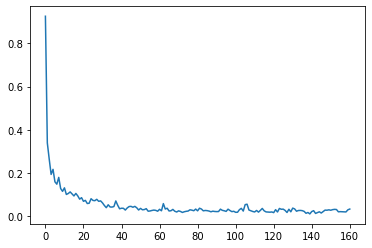

In [8]:
lr = 0.01

y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)
print("TabNet MAE",mae_tab)